In [97]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics
% end of housekeeping

# self directed mfile practice

make an mfile for each practice problem below.  I will include a code block that does the same thing here. But don't look at the code block until  you have tried it first on your own.  But if you get stuck the code his here to help you.

# practice 1: graphing

let's make four subplots of arbitrary functions.  We will make each plot in a different way. so for plotting let's use the function 

$$ y=mx + b $$

let's assume a slope ($m$) of 6 and an intercept ($b$) of -6.

let's use an x-vector from -5 to +5 in steps of 0.5

so subplots have 3 numbers.  subplot(###) specifies the number of rows and columns (first two entries) and the third entry is which subplot counting from top to bottom and left to right).

so top left of a $2 X 2$ array of plots would be subplot(221), top right (222), bottom left (223), bottom right would be (224).

after a subplot command you can put in any type of plot you want.  plot, hist, histfit, contour, mesh, ...

## suplot(221)

so for practice let's start with just plotting circles for the data.  so in subplot(221) make the y versus x plot  using circles (command is plot(x,y,'ko'), where the k means black (b is already taken for blue).

## subplot(222)

let's plot the data as a green line

plot(x,y,'g-')  will plot it as a green single line. and we can make the line thicker if we specify the linewidth.  you can do this two ways.  directly with the plot command or by using handles you can do it after.  I will put both methods in the mfile code block below but I'll comment out the handle method.  (sometimes handles are useful if you make a complex plot and you need to modify specific things).  With a handle if you type get(h) you will see all the things you can change for that object.  So that can help in figuring out how to make the graph look exactly like you want.  (handles are just numbers that matlab uses to keep track of the graphic objects).

plot(x,y,'k-','linewidth',2,'color','g') just for fun I show you an alternate way to change the line colour.  you can pass lots of options to the plotting in this way.

## subplot(223)

you can use different symbols in your plotting, circles, dots, squares, ... you can specify the colour and size of the symbols.

so for this plot, let's make large triangles that are red.  colours are r=red, g=green, m=magenta, k=black, w=white, b=blue, c=cyan and y=yellow (maybe I forgot some?).  you can specify colours using the triplet of numbers.  for this if you use the same number for each you will get different shades of gray (good for black and white publications)

plot(x,y,'k>','markersize',4,'markerfacecolor','r')

markersize the number just makes them bigger or smaller,  markerfacecolor makes the face change colour.  But the fact that we used "k>" in the original plot command makes those shapes outlined in black (I think the black outline always looks better).

let's add a second set by adding 10 to our y data and make them 50% gray squares.  s is for sqare, o for circle, . for dot, * for *, > and < for triangles.  the closed symbols can have fill colours.

plot(x,y+10,'ks','markersize',10,'markerfacecolor',[0.5 0.5 0.5])

## subplot(224)

we can add a legend to a plot if we plot all the different data in order in a single plot command.  you can also add legends to plots that you make using successive "holds" but it is a little less straightforward.  I always google how to do that each time I want to do it (or I look at a previous time I did it).

so let's plot the data and the data plus 10 with asterisk and circles.  and fill the circle with cyan.  then add a legend. I find this easier to do with handles to the plot command.  h=plot(x,y,'k*',x,y+10,'ko') will return two handles.  to change each you need to use set(h(1),... and set(h(2),.... and specify the property, 'color','linewidth', ... that you want to change)

the legend command just takes the names listed in order in quotes.  Then you can specify location if  you add that after the names and after you say location you put in the location (north, south, west, east, northwest, northeast, ... and if you add outside to the cardinal direction it will put the legend outside the axis).  Here I think ...,'location','northwest' looks best.


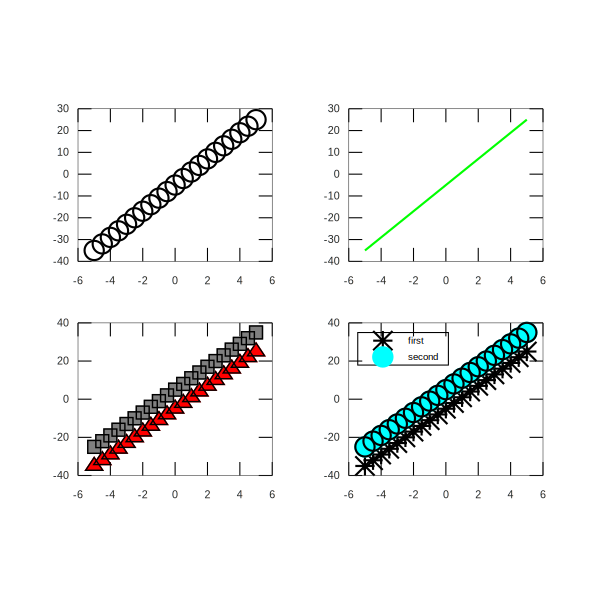

In [105]:
%plot -s 600,600 -f 'svg'
% first make the function for plotting

m=6; b=-5;
x=-5:0.5:5; y=m*x+b;

% now make the plots ---------------------------------------

subplot(221)

plot(x,y,'ko')

subplot(222)

plot(x,y,'k-','linewidth',2,'color','g')

%uncomment this to see the alternate way to do it and see a little bit of what handles can offer
%h=plot(x,y,'k-')
%get(h)
%set(h,'linewidth',2,'color','g')

subplot(223)
plot(x,y,'k>','markersize',4,'markerfacecolor','r')
hold on

plot(x,y+10,'ks','markersize',4,'markerfacecolor',[0.5 0.5 0.5])

subplot(224)
h=plot(x,y,'k*',x,y+10,'ko');
legend('first','second','location','northwest');
set(h(1),'linewidth',2);
set(h(2),'markerfacecolor','c','linewidth',2);

# Input data into Matlab and mathematical operations

So, the "mat" in matlab stands for matrix.  (not sure how Octave was named).  So matrices are useful ways to contain our data (a 1D matrix is called a vector).  So we can do matrix math if we have matracies or using "." we can operate on each element of an array individually - so do lots of calulations fast (like a row or column operation in a spreadsheet but hidden)

To practice this let's make a $10x10$ matrix of random numbers using the randn command

data=randn(10,10);

Now we can pull out columns and manipulate them, or plot them or whatever. You can think of this like a table of data, often I put the different variables in columns, so the first column might be temperature, second column, mass, third column, uv-vis absorbance, ... whatever.

So let's plot column 1 versus column 6.  It won't look like anything but scatter but it is still good practice for you I think.

x=data(:,1); % the full colon means all the entries, so all the rows in this case, and the 1 means the first column.  (data(1,:) would give you the first row).

y=data(:,6)

plot(x,y,'ko','markersize',10,'markerfacecolor','b')

and to add to our plot let's make the graphic axis have a wider line (use set(gca) for this) and add x and y labels.

set(gca,'linewidth',2,'fontsize',11)
xlabel('variable 1'); ylabel('variable 2')

just for fun because this data is centred on zero add a horizontal line to your plot. and let's use the range of the data to define the ends of our line.  So max and min commands.  value=min(x) will return the minimum value of x. and let's make the values just a little wider than the data. 20% smaller and 20% bigger on the min and max ends respectively.  (note you will need to use the absolute value of the min and max because they could be negative and if you just subtract a negative a value you'll actually make the limits smaller than the data, not wider.

lowx=min(x)-0.2*(abs(min(x)); highx=max(x)+0.2*(abs(max(x)); 

often it is also useful to have a 1:1 line for comparisons.  above or below the 1:1 if we are trying to do predictions.  So, let's add a 1:1 line to this plot.  simply plot(x,x) will be 1:1.  let's add that as a dashed line.

plot(x,x,'k--','linewidth',2)  line styles include -, -., --, :

sometimes the automatic axis does not do a great job.  so we can do a better job using or max and min of x and y.

lowy=min(y)-0.2*(abs(min(y)); highy=max(y)+0.2*(abs(max(y)); 

and the axis command 

axis([lowx highx lowy highy])



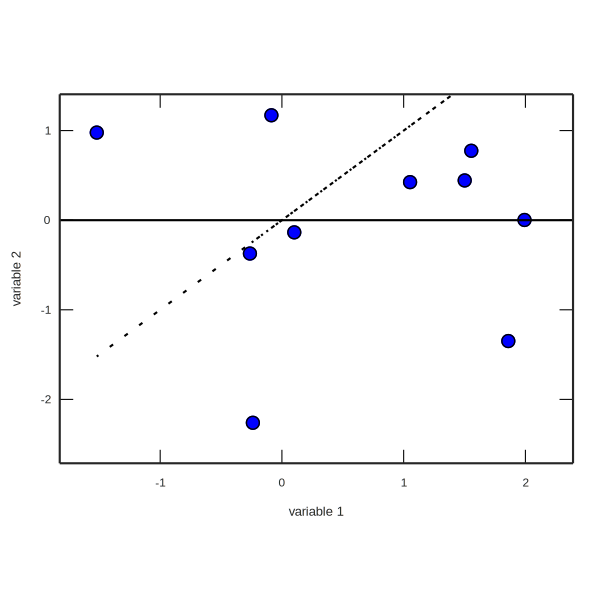

In [99]:
data=randn(10,10);

x=data(:,1); y=data(:,2);
plot(x,y,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',2,'fontsize',11)
xlabel('variable 1'); ylabel('variable 2')

hold on
lowx=min(x)-0.2*abs(min(x)); highx=max(x)+0.2*abs(max(x)); 

plot([lowx highx],[0 0],'k-','linewidth',2)

% now 1:1 line

plot(x,x,'k:','linewidth',2)

lowy=min(y)-0.2*abs(min(y)); highy=max(y)+0.2*abs(max(y)); 

axis([lowx highx lowy highy])



# loops and conditional logic

The general structure of for loops can be expressed:

for (counter) = (start):(increment):(end)

     (stuff to be done in for loop)

end



let's make a loop to calculate the radioactive decay of U.

$$U = (1-alpha)^t $$

alpha = 0.143 amd start with U=1;  and do 25 time steps


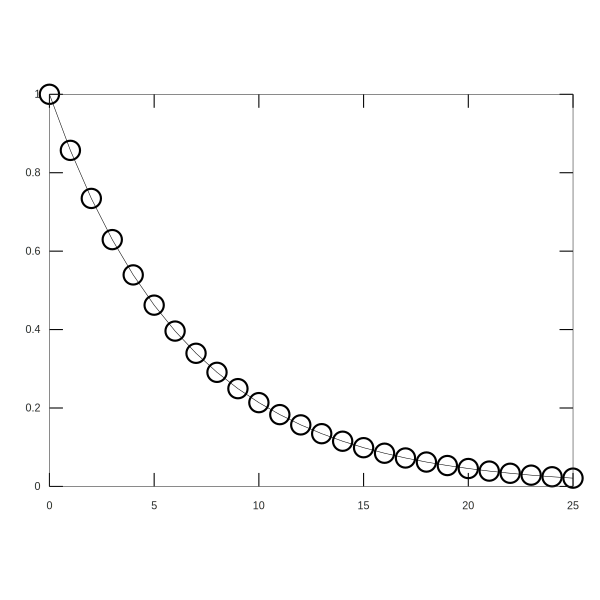

In [100]:
alpha = 0.143;
t = 0:1:25;
r(1) = 1;
for k=2:26;
    r(k) = (1-alpha)*r(k-1);
end
plot(t,r,'ko')

% note we could have done this with just a function

R=(1-alpha).^t;

hold on
plot(t,R,'k-')


## conditional logic

we can use if commands to check for true or false and make decisions

let's write a script to generate random numbers in a loop and sum them each step.  then see how many steps it took to add up to 20

we need an infinite looop for this because we don't know the answer to begin with

so start a conditional loop, it will go until the sum is 20

while total < 20




In [101]:
% we need to start with an infiinte loop

total=0;
count=0;

while total <20
    count = count + 1;
    x=rand; % not randn because randn will also give values that are negative and the sum will tend to 0
    total=total+x;
end

count


count = 36


## nested loops

we can put loops inside each other.  let's make a plot of z versus x versus y for the function

$$ xe^{-x^2-y^2} $$

start by making x and y then calculate z

x=-2:0.1:2; y=x;

loop over both variables being sure to keep track of which is which (usually i for the first loop and j for the second loop and k if there is a third loop).

we can use mesh or contour to visualize the z data

commands are mesh(x,y,z) and contour(x,y,z,10) where the last number species how many contour lines to draw.

we don't actualy need loops to do this calculation but it is good practice

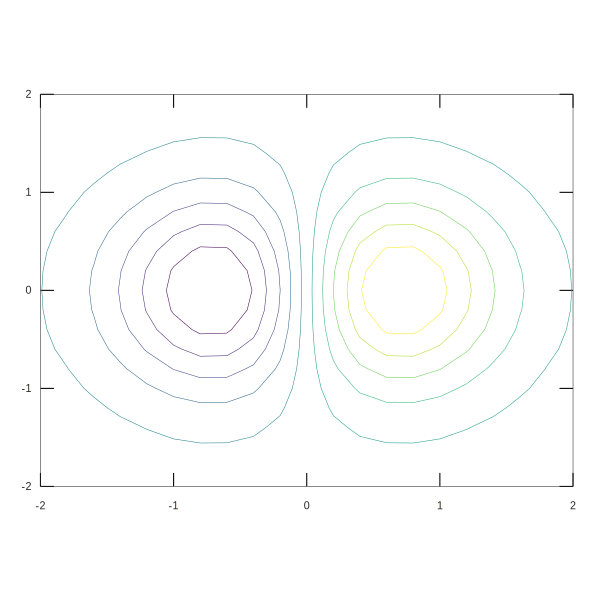

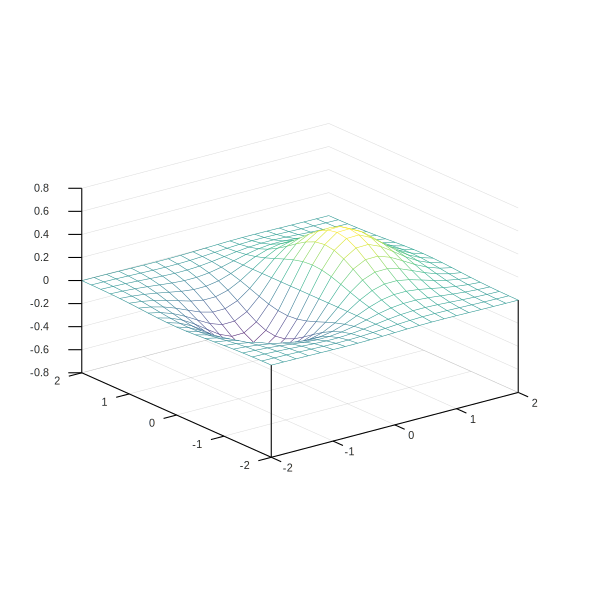

In [102]:
%then loop through both of them and caluculate z at each step

x=-2:0.2:2; y=x;

for i=1:length(x) % this will go through each element of x
    for j=1:length(y) %this will go through each element of y
        z(j,i)=x(i)*exp(-x(i)^2-y(j)^2); %these are our z values
    end
end

figure(1)
mesh(x,y,z)

figure(2)
contour(x,y,z,10)
